In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.concat([pd.read_csv('train.csv'), pd.read_csv('test.csv')])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [3]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [4]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [5]:
greeting = [x.split(',')[1].split('.')[0] for x in df.Name.values]
df["greeting"] = greeting
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket greeting  
0       3    male      1       0.0         A/5 21171       Mr  
1       1  female      1       1.0          PC 17599      Mrs  
2       3  female      0       1.0  STON/O2. 3101282     Miss  
3       1  female      1       1.0            113803      Mrs  
4       3   

In [6]:
df['greeting'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Capt              1
 Lady              1
 the Countess      1
 Jonkheer          1
 Don               1
 Dona              1
 Mme               1
 Sir               1
Name: greeting, dtype: int64

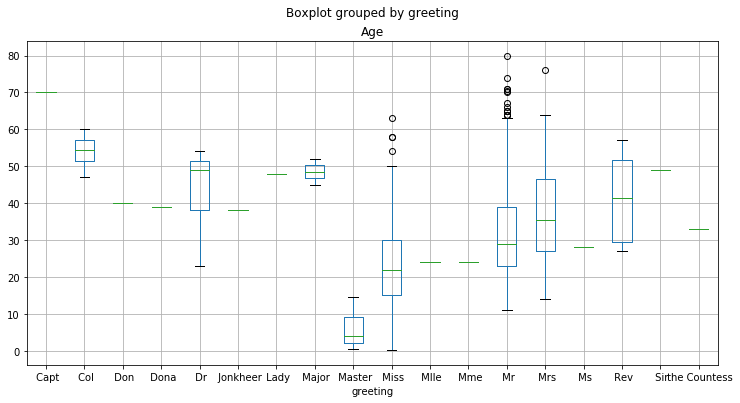

In [7]:
df.boxplot(column='Age', by='greeting', figsize=(12,6))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
greeting       1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [9]:
table = df.pivot_table(values='Age', \
                       index=['greeting'], \
                       columns=['Pclass', 'Sex'], \
                       aggfunc=np.median)
print(table)

Pclass             1            2            3      
Sex           female  male female  male female  male
greeting                                            
 Capt            NaN  70.0    NaN   NaN    NaN   NaN
 Col             NaN  54.5    NaN   NaN    NaN   NaN
 Don             NaN  40.0    NaN   NaN    NaN   NaN
 Dona           39.0   NaN    NaN   NaN    NaN   NaN
 Dr             49.0  47.0    NaN  38.5    NaN   NaN
 Jonkheer        NaN  38.0    NaN   NaN    NaN   NaN
 Lady           48.0   NaN    NaN   NaN    NaN   NaN
 Major           NaN  48.5    NaN   NaN    NaN   NaN
 Master          NaN   6.0    NaN   2.0    NaN   6.0
 Miss           30.0   NaN   20.0   NaN   18.0   NaN
 Mlle           24.0   NaN    NaN   NaN    NaN   NaN
 Mme            24.0   NaN    NaN   NaN    NaN   NaN
 Mr              NaN  41.5    NaN  30.0    NaN  26.0
 Mrs            45.0   NaN   30.5   NaN   31.0   NaN
 Ms              NaN   NaN   28.0   NaN    NaN   NaN
 Rev             NaN   NaN    NaN  41.5    NaN

In [10]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [11]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs


In [13]:
df.sort_values(by='Ticket')[50:70]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
74,35.0,C130,C,211.5000,"Geiger, Miss. Amalie",0,966,1,female,0,NaN,113503,Miss
377,27.0,C82,C,211.5000,"Widener, Mr. Harry Elkins",2,378,1,male,0,0.0,113503,Mr
166,NaN,E33,S,55.0000,"Chibnall, Mrs. (Edith Martha Bowerman)",1,167,1,female,0,1.0,113505,Mrs
356,22.0,E33,S,55.0000,"Bowerman, Miss. Elsie Edith",1,357,1,female,0,1.0,113505,Miss
26,22.0,B36,C,61.9792,"Ostby, Miss. Helene Ragnhild",1,918,1,female,0,NaN,113509,Miss
54,65.0,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,55,1,male,0,0.0,113509,Mr
351,NaN,C128,S,35.0000,"Williams-Lambert, Mr. Fletcher Fellows",0,352,1,male,0,0.0,113510,Mr
252,62.0,C87,S,26.5500,"Stead, Mr. William Thomas",0,253,1,male,0,0.0,113514,Mr
829,62.0,B28,NaN,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs
61,38.0,B28,NaN,80.0000,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss


In [14]:
df['Embarked'].fillna('S', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
greeting       1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [16]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [18]:
df.sort_values(by='Ticket', ascending=False)[440:460]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
198,NaN,NaN,Q,7.7500,"Madigan, Miss. Margaret ""Maggie""",0,199,3,female,0,1.0,370370,Miss
116,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,0.0,370369,Mr
227,NaN,NaN,Q,7.7500,"McNeill, Miss. Bridget",0,1119,3,female,0,NaN,370368,Miss
186,NaN,NaN,Q,15.5000,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",0,187,3,female,1,1.0,370365,Mrs
364,NaN,NaN,Q,15.5000,"O'Brien, Mr. Thomas",0,365,3,male,1,0.0,370365,Mr
424,18.0,NaN,S,20.2125,"Rosblom, Mr. Viktor Richard",1,425,3,male,1,0.0,370129,Mr
254,41.0,NaN,S,20.2125,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",2,255,3,female,0,0.0,370129,Mrs
284,2.0,NaN,S,20.2125,"Rosblom, Miss. Salli Helena",1,1176,3,female,1,NaN,370129,Miss
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr
230,35.0,C83,S,83.4750,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",0,231,1,female,1,1.0,36973,Mrs


In [19]:
fare_mean = df[(df.Age>55)&(df.Pclass==3)&(df.Sex=='male')]['Fare'].mean()
print(fare_mean)

7.46875


In [20]:
df["Fare"].fillna(fare_mean, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
greeting       1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [22]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [23]:
sex_dummies = pd.get_dummies(df["Sex"])
print(sex_dummies.info())
print(sex_dummies[:5])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 2 columns):
female    1309 non-null uint8
male      1309 non-null uint8
dtypes: uint8(2)
memory usage: 12.8 KB
None
   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1


In [25]:
df['female'] = sex_dummies['female']
df.drop('Sex', axis=1, inplace=True)

In [26]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,greeting,female
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,0,NaN,A.5. 3236,Mr,0
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,NaN,PC 17758,Dona,1
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,0,NaN,SOTON/O.Q. 3101262,Mr,0
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,0,NaN,359309,Mr,0
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,1,NaN,2668,Master,0


In [27]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [28]:
df.tail()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,greeting,female
413,NaN,S,8.0500,0,1305,3,0,NaN,Mr,0
414,39.0,C,108.9000,0,1306,1,0,NaN,Dona,1
415,38.5,S,7.2500,0,1307,3,0,NaN,Mr,0
416,NaN,S,8.0500,0,1308,3,0,NaN,Mr,0
417,NaN,C,22.3583,1,1309,3,1,NaN,Master,0


In [29]:
df.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [34]:
df.greeting.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Capt              1
 Lady              1
 the Countess      1
 Jonkheer          1
 Don               1
 Dona              1
 Mme               1
 Sir               1
Name: greeting, dtype: int64

In [30]:
def get_dummie(data, column):
    """Convert to binar number of categories"""
    
    df_dummie = pd.get_dummies(df[column][:], prefix=column)
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [32]:
x = df.loc[:,:]
df = get_dummie(x, "Embarked")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
greeting       1309 non-null object
female         1309 non-null uint8
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
dtypes: float64(3), int64(4), object(2), uint8(4)
memory usage: 107.4+ KB


In [35]:
x = df.loc[:,:]
df = get_dummie(x, 'greeting')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 31 columns):
Age                       1046 non-null float64
Embarked                  1309 non-null object
Fare                      1309 non-null float64
Parch                     1309 non-null int64
PassengerId               1309 non-null int64
Pclass                    1309 non-null int64
SibSp                     1309 non-null int64
Survived                  891 non-null float64
greeting                  1309 non-null object
female                    1309 non-null uint8
Embarked_C                1309 non-null uint8
Embarked_Q                1309 non-null uint8
Embarked_S                1309 non-null uint8
greeting_ Capt            1309 non-null uint8
greeting_ Col             1309 non-null uint8
greeting_ Don             1309 non-null uint8
greeting_ Dona            1309 non-null uint8
greeting_ Dr              1309 non-null uint8
greeting_ Jonkheer        1309 non-null uint8
greeting_ Lad

In [37]:
df.drop(['Embarked', 'greeting'], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 29 columns):
Age                       1046 non-null float64
Fare                      1309 non-null float64
Parch                     1309 non-null int64
PassengerId               1309 non-null int64
Pclass                    1309 non-null int64
SibSp                     1309 non-null int64
Survived                  891 non-null float64
female                    1309 non-null uint8
Embarked_C                1309 non-null uint8
Embarked_Q                1309 non-null uint8
Embarked_S                1309 non-null uint8
greeting_ Capt            1309 non-null uint8
greeting_ Col             1309 non-null uint8
greeting_ Don             1309 non-null uint8
greeting_ Dona            1309 non-null uint8
greeting_ Dr              1309 non-null uint8
greeting_ Jonkheer        1309 non-null uint8
greeting_ Lady            1309 non-null uint8
greeting_ Major           1309 non-null uint8
greeting_ Maste

In [ ]:
train = df[(df.Survived == 1) | (df.Survived == 0)]
train.info()

In [ ]:
survived = train['Survived'][:].values
print(survived.shape)
print(survived[:10])

In [ ]:
train.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(train.info())

In [ ]:
test = df[(df.Survived != 1) & (df.Survived != 0)]
test.info()

In [ ]:
PassId = test.PassengerId[:]
print(type(PassId))
print(PassId[:5])

In [ ]:
test.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(test.info())

In [ ]:
X = train.values
y = survived

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print("Shape X_train: {}. Shape y_train: {}. \nShape X_test : {}. Shape y_test : {}". \
     format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])

In [ ]:
pipe_lr.fit(X_train, y_train)
print("Test Accuracy: {:.3f}".format(pipe_lr.score(X_test, y_test)))
y_pred = pipe_lr.predict(X_test)

In [ ]:
submission = pd.read_csv('../input/genderclassmodel.csv', index_col=0, header=0)
print(submission.info())
print(submission.head(10))

In [ ]:
X_test_subm = test.values
print(X_test_subm.shape)

In [ ]:
y_subm = pipe_lr.predict(X_test_subm)
print(y_subm.shape, y_subm[:10])

In [ ]:
submission.Survived = y_subm
print(submission.info())
print(submission.head(10))

In [ ]:
submission.to_csv('submission.csv')